First 5 rows of the dataset:


,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa



Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   sepal length (cm)  150 non-null    float64
 1   sepal width (cm)   150 non-null    float64
 2   petal length (cm)  150 non-null    float64
 3   petal width (cm)   150 non-null    float64
 4   species            150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB
None

Dataset Description:
       sepal length (cm)  sepal width (cm)  petal length (cm)  \
count         150.000000        150.000000         150.000000   
mean            5.843333          3.057333           3.758000   
std             0.828066          0.435866           1.765298   
min             4.300000          2.000000           1.000000   
25%             5.100000          2.800000           1.600000   
50%             5.800000          3.000000           4.350000   
75%        

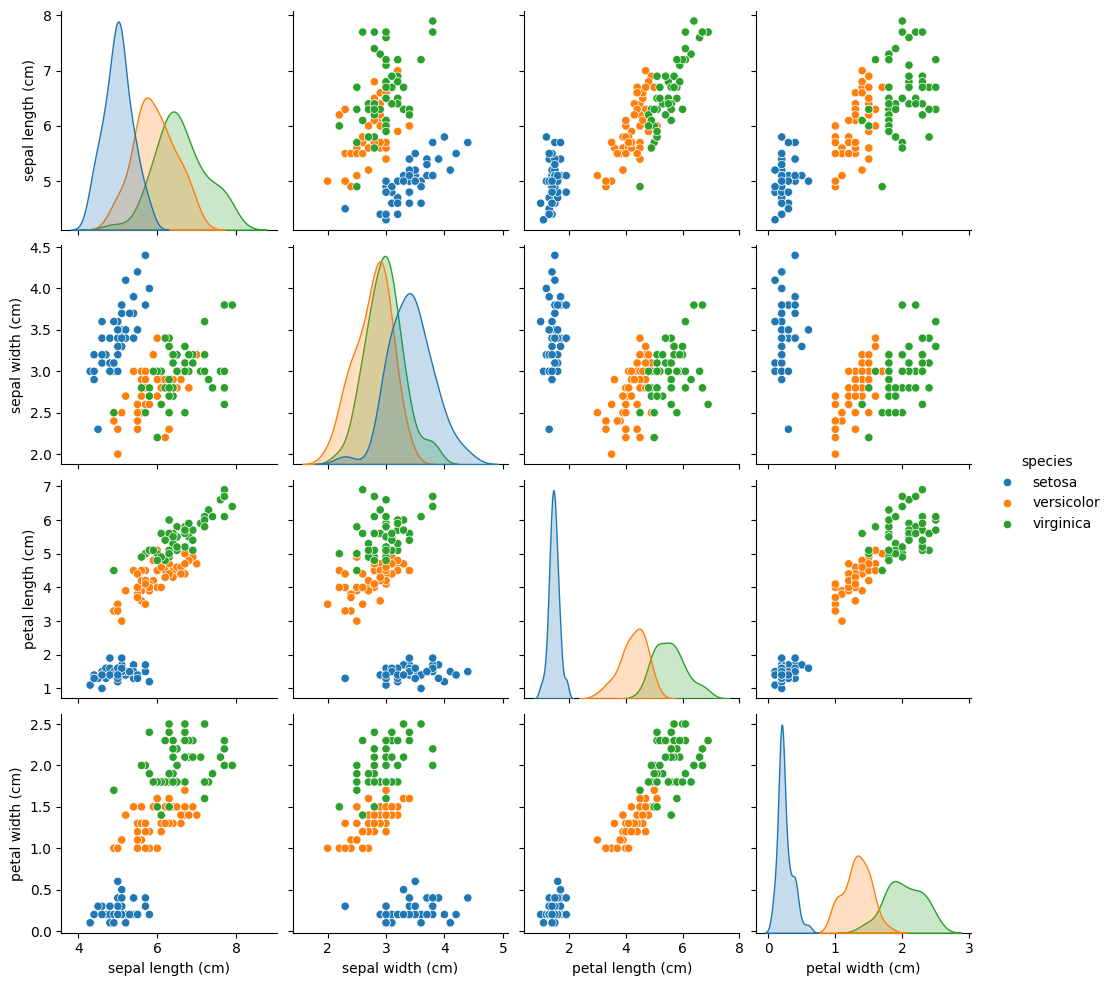

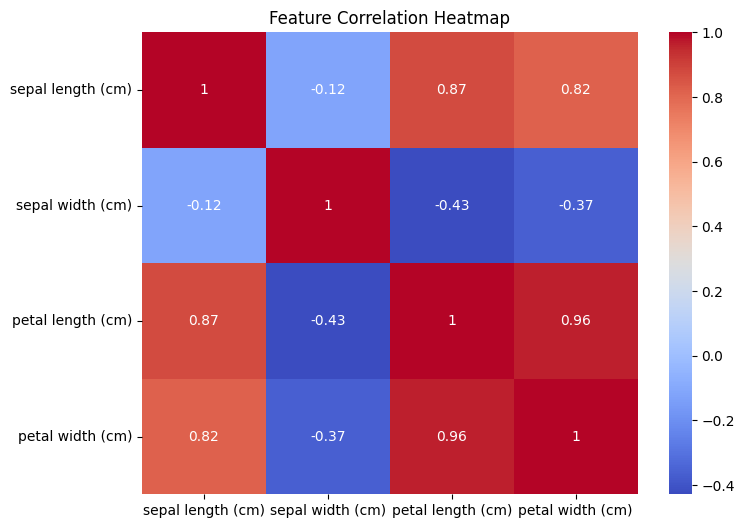


Number of samples per species:
species
setosa        50
versicolor    50
virginica     50
Name: count, dtype: int64

Training and Testing Split:
Training samples: 120
Testing samples: 30

Model Accuracy: 1.0

Confusion Matrix:
[[10  0  0]
 [ 0  9  0]
 [ 0  0 11]]

Classification Report:
              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        10
  versicolor       1.00      1.00      1.00         9
   virginica       1.00      1.00      1.00        11

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30



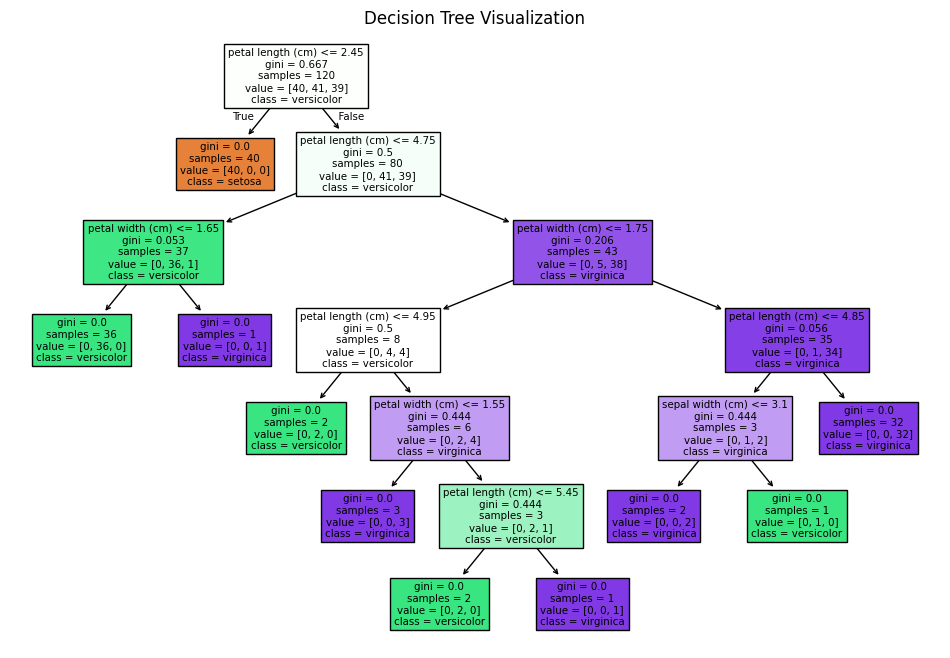

In [3]:
# Iris Flower Classification Project
# Internship: Cloudcredits Technologies

# ---------------------------
# 1. Import required libraries
# ---------------------------
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# ---------------------------
# 2. Load the Iris dataset
# ---------------------------
iris = load_iris()
data = pd.DataFrame(iris.data, columns=iris.feature_names)
data['species'] = iris.target
data['species'] = data['species'].map({0: 'setosa', 1: 'versicolor', 2: 'virginica'})

print("First 5 rows of the dataset:")
display(data.head())

# ---------------------------
# 3. Exploratory Data Analysis (EDA)
# ---------------------------
print("\nDataset Info:")
print(data.info())

print("\nDataset Description:")
print(data.describe())

# Check for missing values
print("\nMissing Values in the Dataset:")
print(data.isnull().sum())

# Pairplot visualization
sns.pairplot(data, hue="species")
plt.show()

# Correlation Heatmap
plt.figure(figsize=(8,6))
sns.heatmap(data.iloc[:,:-1].corr(), annot=True, cmap='coolwarm')
plt.title("Feature Correlation Heatmap")
plt.show()

# Count of each species
print("\nNumber of samples per species:")
print(data['species'].value_counts())

# ---------------------------
# 4. Split Data into Train and Test Sets
# ---------------------------
X = data.iloc[:, :-1]  # Features
y = data['species']    # Target

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

print("\nTraining and Testing Split:")
print(f"Training samples: {X_train.shape[0]}")
print(f"Testing samples: {X_test.shape[0]}")

# ---------------------------
# 5. Train the Decision Tree Model
# ---------------------------
model = DecisionTreeClassifier(random_state=42)
model.fit(X_train, y_train)

# ---------------------------
# 6. Make Predictions
# ---------------------------
y_pred = model.predict(X_test)

# ---------------------------
# 7. Evaluate the Model
# ---------------------------
print("\nModel Accuracy:", accuracy_score(y_test, y_pred))
print("\nConfusion Matrix:")
print(confusion_matrix(y_test, y_pred))
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

# ---------------------------
# 8. Visualize the Decision Tree
# ---------------------------
plt.figure(figsize=(12,8))
plot_tree(model, feature_names=iris.feature_names,
          class_names=iris.target_names, filled=True)
plt.title("Decision Tree Visualization")
plt.show()
